## Predicting Power Plant ML Pipeline using Logistic Regression

*We are trying to predict power output given a set of readings from various sensors in a gas-fired power generation plant.  Power generation is a complex process, and understanding and predicting power output is an important element in managing a plant and its connection to the power grid.*

More information about Peaker or Peaking Power Plants can be found on Wikipedia https://en.wikipedia.org/wiki/Peaking_power_plant


Given this business problem, we need to translate it to a Machine Learning task.  The ML task is regression since the label (or target) we are trying to predict is numeric.


The example data is provided by UCI at [UCI Machine Learning Repository Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

You can read the background on the UCI page, but in summary we have collected a number of readings from sensors at a Gas Fired Power Plant
(also called a Peaker Plant) and now we want to use those sensor readings to predict how much power the plant will generate.


In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
#reading the data from the disk into memory
df1 = pd.read_csv("../data/CCPP/Folds5x2_pp/ccpp1.csv")
df2 = pd.read_csv("../data/CCPP/Folds5x2_pp/ccpp2.csv")
df3 = pd.read_csv("../data/CCPP/Folds5x2_pp/ccpp3.csv")
df4 = pd.read_csv("../data/CCPP/Folds5x2_pp/ccpp4.csv")
df5 = pd.read_csv("../data/CCPP/Folds5x2_pp/ccpp5.csv")
df = pd.concat([df1, df2, df3, df4, df5])

In [11]:
#Just a reminder, here are all the column names
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

Schema Definition
Our schema definition from UCI appears below:
* AT = Atmospheric Temperature in C
* V = Exhaust Vaccum Speed
* AP = Atmospheric Pressure
* RH = Relative Humidity
* PE = Power Output
* PE is our label or target: This is the value we are trying to predict given the measurements.

Reference UCI Machine Learning Repository Combined Cycle Power Plant Data Set:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [4]:
df.shape

(47840, 5)

In [5]:
df[:5]

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Visualize the Data

To understand our data, we will look for correlations between features and the label.  This can be important when choosing a model.  E.g., if features and a label are linearly correlated, a linear model like Linear Regression can do well; if the relationship is very non-linear, more complex models such as Decision Trees can be better. 

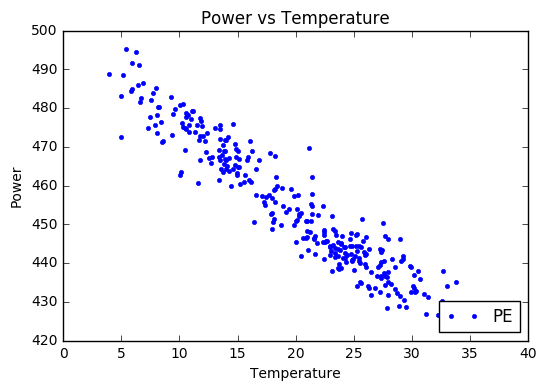

In [6]:
plt.figure()
plt.plot(df[:300].AT, df[:300].PE, '.')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Power vs Temperature')
plt.legend(loc="lower right")
plt.show()

Strong linear relationship between Temperature and Power output!

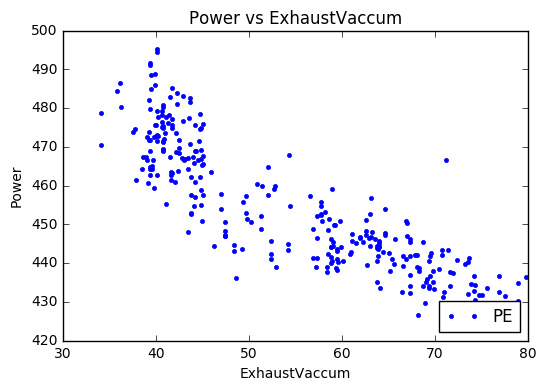

In [32]:
plt.figure()
plt.plot(df[:300].V, df[:300].PE, '.')
plt.xlabel('ExhaustVaccum')
plt.ylabel('Power')
plt.title('Power vs ExhaustVaccum')
plt.legend(loc="lower right")
plt.show()

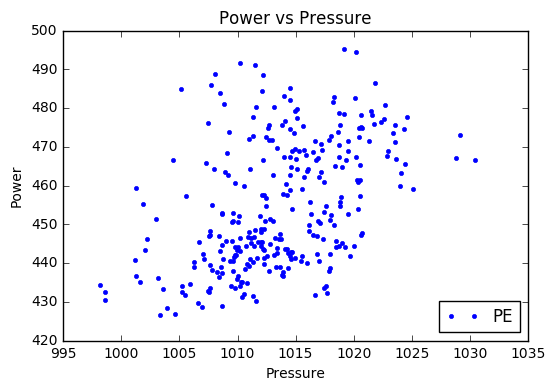

In [33]:
plt.figure()
plt.plot(df[:300].AP, df[:300].PE, '.')
plt.xlabel('Pressure')
plt.ylabel('Power')
plt.title('Power vs Pressure')
plt.legend(loc="lower right")
plt.show()

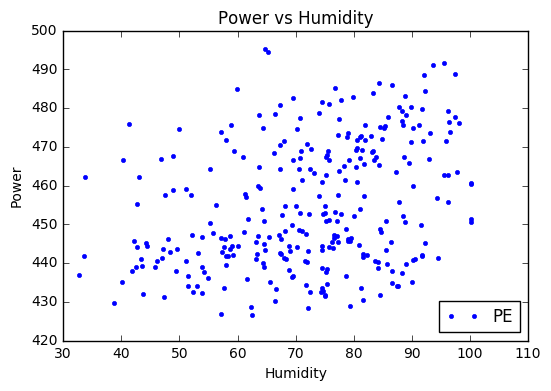

In [34]:
plt.figure()
plt.plot(df[:300].RH, df[:300].PE, '.')
plt.xlabel('Humidity')
plt.ylabel('Power')
plt.title('Power vs Humidity')
plt.legend(loc="lower right")
jkl;klj;lkjplt.show()

## Data Modeling
Now let's model our data to predict what the power output will be given a set of sensor readings
Our first model will be based on simple linear regression since we saw some linear patterns in our data based on the scatter plots during the exploration stage.


In [12]:
from sklearn.cross_validation import train_test_split
y =  df.PE
del df['PE']
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [14]:
x_train.shape

(38272, 4)

In [16]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.97664459 -0.23404295  0.06343642 -0.15867958]


In [18]:
y_pred = regr.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

20.216126066280182

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.93047542162962227

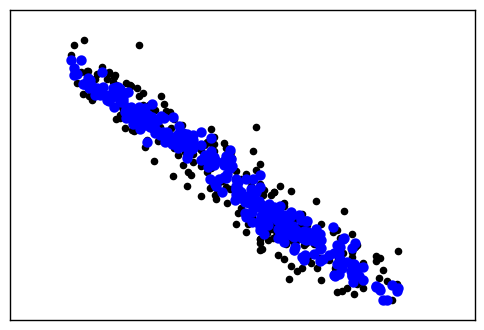

In [86]:
plt.scatter(x_test.AT[:300], y_test[:300],  color='black')
plt.scatter(x_test.AT[:300], y_pred[:300], color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Tuning and Evaluation
Now that we have a model with all of the data let's try to make a better model by tuning over several parameters.

In [98]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(alphas=(0.1, 1.0, 10.0))
ridgeCV.fit(x_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [99]:
mean_squared_error(y_test, ridgeCV.predict(x_test))

20.216130048996082

In [100]:
r2_score(y_test, ridgeCV.predict(x_test))

0.93047540793280203

So our initial untuned and tuned linear regression models are statistically identical.
Given that the only linearly correlated variable is Temperature, it makes sense try another machine learning method such a Decision Tree to handle non-linear data and see if we can improve our model
A Decision Tree creates a model based on splitting variables using a tree structure. We will first start with a single decision tree model.

In [21]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [102]:
mean_squared_error(y_test, regressor.predict(x_test))

3.6641137965583318e-28

In [103]:
r2_score(y_test, regressor.predict(x_test))

1.0

Much better results!